In [1]:
# Loading the cifar10 dataset
import tensorflow 
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

Using TensorFlow backend.


In [2]:
#loading required libraries
import numpy
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [11]:
labels=["beaver","dolphin","otter","seal","whale","aquarium fish","flatfish","ray","shark","trout","orchids","poppies","roses","sunflowers","tulips","bottles",
"bowls","cans",
"cups",
"plates",
"apples",
"mushrooms",
"oranges",
"pears",
"sweet peppers",
"clock",
"computer keyboard",
"lamp",
"telephone",
"television",
"bed",
"chair",
"couch",
"table",
"wardrobe",
"bee",
"beetle",
"butterfly",
"caterpillar",
"cockroach",
"bear",
"leopard",
"lion",
"tiger",
"wolf",
"bridge",
"castle",
"house",
"road",
"skyscraper",
"cloud",
"forest",
"mountain",
"plain",
"sea",
"camel",
"cattle",
"chimpanzee",
"elephant",
"kangaroo",
"fox",
"porcupine",
"possum",
"raccoon",
"skunk",
"crab",
"lobster",
"snail",
"spider",
"worm",
"baby",
"boy",
"girl",
"man",
"woman",
"crocodile",
"dinosaur",
"lizard",
"snake",
"turtle",
"hamster",
"mouse",
"rabbit",
"shrew",
"squirrel",
"maple",
"oak",
"palm",
"pine",
"willow",
"bicycle",
"bus",
"motorcycle",
"pickup truck",
"train",
"lawn-mower",
"rocket",
"streetcar",
"tank",
"tractor"]

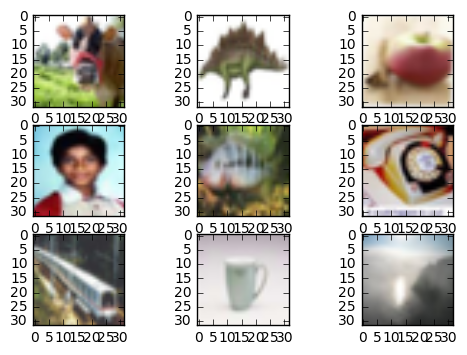

In [3]:
# load data the cifar10 data  into training and test 
(X_train100, y_train100), (X_test100, y_test100) = cifar100.load_data()
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train100[i]))
# show the plot
pyplot.show()

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train100 = X_train100.astype('float32')
X_test100 = X_test100.astype('float32')
X_train100 = X_train100 / 255.0
X_test100 = X_test100 / 255.0

In [5]:
# one hot encode outputs
y_train100 = np_utils.to_categorical(y_train100)
y_test100 = np_utils.to_categorical(y_test100)
num_classes=y_test100.shape[1]
print(num_classes)

100


In [6]:
# Create the model
Conv_neural_net = Sequential()
Conv_neural_net.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
Conv_neural_net.add(Dropout(0.2))
Conv_neural_net.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
Conv_neural_net.add(MaxPooling2D(pool_size=(2, 2)))
Conv_neural_net.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
Conv_neural_net.add(Dropout(0.2))
Conv_neural_net.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
Conv_neural_net.add(MaxPooling2D(pool_size=(2, 2)))
Conv_neural_net.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Conv_neural_net.add(Dropout(0.2))
Conv_neural_net.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Conv_neural_net.add(MaxPooling2D(pool_size=(2, 2)))
Conv_neural_net.add(Flatten())
Conv_neural_net.add(Dropout(0.2))
Conv_neural_net.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
Conv_neural_net.add(Dropout(0.2))
Conv_neural_net.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
Conv_neural_net.add(Dropout(0.2))
Conv_neural_net.add(Dense(256, activation='relu', kernel_constraint=maxnorm(3)))
Conv_neural_net.add(Dropout(0.2))
Conv_neural_net.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
Conv_neural_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(Conv_neural_net.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        36928     
__________

In [8]:
Conv_neural_net.fit(X_train100, y_train100,epochs=5, batch_size=64)

Epoch 1/5
50000/50000 [==============================] - 917s - loss: 4.4947 - acc: 0.0222         

In [9]:
Conv_neural_net.fit(X_train100, y_train100,epochs=5, batch_size=64)

Epoch 1/5
50000/50000 [==============================] - 894s - loss: 3.5056 - acc: 0.1597     

In [10]:
# Final evaluation of the model
scores = Conv_neural_net.evaluate(X_test100, y_test100, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 22.49%


Accuracy: 33.33%


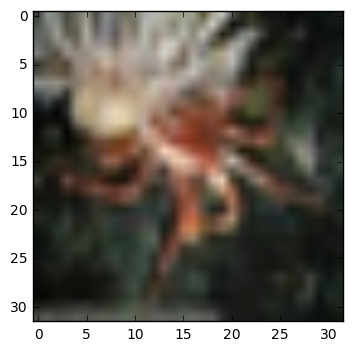

forest


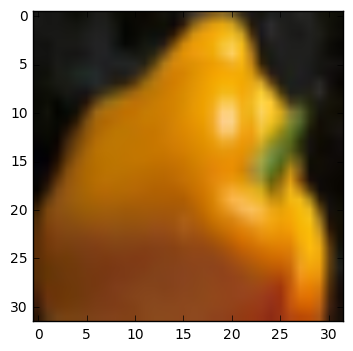

plain


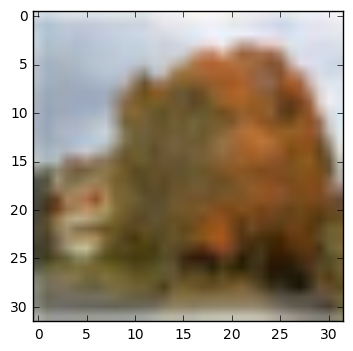

house


In [18]:
k=100
n=3
scores = Conv_neural_net.evaluate(X_test100[k:k+n,], y_test100[k:k+n,], verbose=0)
s=Conv_neural_net.predict(X_test100[k:k+n,], batch_size=64, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
for i in range(len(s)):
        for j in range(len(s[i,])):
                if s[i,j]==max(s[i,]):
                    #pyplot.subplot(330 + 1 + i)
                    pyplot.imshow(toimage(X_test100[k+i,]))
                    pyplot.show()
                    print(labels[j])